In [1]:
import pandas as pd
import re
from itertools import chain
import seaborn as sns

In [2]:
# ! pip install underthesea

In [3]:
df = pd.read_csv("C:\\Users\\ASUS\\Desktop\\AI Project\\MED\\medicine_sample.csv", sep='\t',header=1, encoding='utf-16le',engine='python')

In [4]:
df.rename_axis

<bound method NDFrame.rename_axis of            1    NGUYỄN VĂN BÌNH  61  c  ngoaitru  \
0          2        VÕ THỊ PHÀO  71  c  ngoaitru   
1          3    NGUYỄN BẢO QUỐC  38  c  ngoaitru   
2          4    NGUYỄN KHẮC ĐẠI  63  c  ngoaitru   
3          5  LƯU THỊ XUÂN DUNG  53  c  ngoaitru   
4          6    NGUYỄN NGỌC HẢI  63  c  ngoaitru   
...      ...                ...  .. ..       ...   
19948  19950      Trần Khánh An   3  c    noitru   
19949  19951       HÀ THỊ NHUNG  71  c    noitru   
19950  19952     Dương Đức Hành  48  c  ngoaitru   
19951  19953       PHAN THỊ QÚY  86  c  ngoaitru   
19952  19954   NGUYỄN THỊ CHIẾN  49  c  ngoaitru   

         Xã Thạch Trung, Thành phố Hà Tĩnh, Tỉnh Hà Tĩnh  Nam     904735195  \
0      thôn An Thạnh 1, Xã An Hải, Huyện Ninh Phước, ...   Nữ  9.167535e+08   
1             Xã Phước Hữu, Huyện Ninh Phước, Ninh Thuận  Nam  2.593673e+09   
2      Thôn Yên Nghĩa Xã Thạch Lưu Huyện Thạch Hà Tỉn...  Nam  9.847100e+08   
3      Chất Thường, Xã

In [5]:
cols = ['ma_don_thuoc' , 'ten_benh_nhan', 'tuoi_benh_nhan', 'loai_don_thuoc', 'hinh_thuc_dieu_tri', 'dia_chi', 'gioi_tinh', 'so_dien_thoai_nguoi_kham_benh', 'can_nang', 'ngay_tai_kham', 'ma_so_the_bao_hiem_y_te', 'thong_tin_don_thuoc', 'so_luong', 'chuan_doan', 'don_vi_tinh', 'ten_thuoc', 'biet_duoc', 'don_cap_phat_thuoc', 'cach_dung','loi_dan','ten_bac_si','don_vi_quan_ly','tinh_thanh','quan_huyen','phuong_xa','ten_co_so_kham_chua_benh','dia_chi_co_so_kham_chua_benh','so_dien_thoai','ma_nha_cung_cap','created_at','updated_at','sold']
df = df.set_axis(cols, axis=1)

In [6]:
df.columns

Index(['ma_don_thuoc', 'ten_benh_nhan', 'tuoi_benh_nhan', 'loai_don_thuoc',
       'hinh_thuc_dieu_tri', 'dia_chi', 'gioi_tinh',
       'so_dien_thoai_nguoi_kham_benh', 'can_nang', 'ngay_tai_kham',
       'ma_so_the_bao_hiem_y_te', 'thong_tin_don_thuoc', 'so_luong',
       'chuan_doan', 'don_vi_tinh', 'ten_thuoc', 'biet_duoc',
       'don_cap_phat_thuoc', 'cach_dung', 'loi_dan', 'ten_bac_si',
       'don_vi_quan_ly', 'tinh_thanh', 'quan_huyen', 'phuong_xa',
       'ten_co_so_kham_chua_benh', 'dia_chi_co_so_kham_chua_benh',
       'so_dien_thoai', 'ma_nha_cung_cap', 'created_at', 'updated_at', 'sold'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19953 entries, 0 to 19952
Data columns (total 32 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ma_don_thuoc                   19953 non-null  int64  
 1   ten_benh_nhan                  19953 non-null  object 
 2   tuoi_benh_nhan                 19953 non-null  int64  
 3   loai_don_thuoc                 19953 non-null  object 
 4   hinh_thuc_dieu_tri             19953 non-null  object 
 5   dia_chi                        19953 non-null  object 
 6   gioi_tinh                      19953 non-null  object 
 7   so_dien_thoai_nguoi_kham_benh  19953 non-null  float64
 8   can_nang                       17771 non-null  float64
 9   ngay_tai_kham                  1611 non-null   float64
 10  ma_so_the_bao_hiem_y_te        13341 non-null  object 
 11  thong_tin_don_thuoc            19953 non-null  object 
 12  so_luong                       19953 non-null 

In [8]:
df

,ma_don_thuoc,ten_benh_nhan,tuoi_benh_nhan,loai_don_thuoc,hinh_thuc_dieu_tri,dia_chi,gioi_tinh,so_dien_thoai_nguoi_kham_benh,can_nang,ngay_tai_kham,...,tinh_thanh,quan_huyen,phuong_xa,ten_co_so_kham_chua_benh,dia_chi_co_so_kham_chua_benh,so_dien_thoai,ma_nha_cung_cap,created_at,updated_at,sold
0,2,VÕ THỊ PHÀO,71,c,ngoaitru,"thôn An Thạnh 1, Xã An Hải, Huyện Ninh Phước, ...",Nữ,9.167535e+08,NaN,NaN,...,58,582,22753,BỆNH VIỆN Y DƯỢC CỔ TRUYỀN NINH THUẬN,Số 05 Lê Hồng Phong - Phường Mỹ Hương - Thành ...,0259 3820668,1.0,3/29/2021 11:12,3/29/2021 11:12,NaN
1,3,NGUYỄN BẢO QUỐC,38,c,ngoaitru,"Xã Phước Hữu, Huyện Ninh Phước, Ninh Thuận",Nam,2.593673e+09,62.0,NaN,...,58,587,22870,TRUNG TÂM Y TẾ HUYỆN NINH PHƯỚC,Chung Mỹ - Thị trấn Phước Dân - Huyện Ninh Phư...,919301156,1.0,3/29/2021 11:12,3/29/2021 11:12,NaN
2,4,NGUYỄN KHẮC ĐẠI,63,c,ngoaitru,Thôn Yên Nghĩa Xã Thạch Lưu Huyện Thạch Hà Tỉn...,Nam,9.847100e+08,53.0,NaN,...,42,436,18091,BV PHỔI TỈNH HÀ TĨNH,- Phường Thạch Quý - Thành phố Hà Tĩnh - Tỉnh ...,2393681368,1.0,3/29/2021 11:12,3/29/2021 11:12,NaN
3,5,LƯU THỊ XUÂN DUNG,53,c,ngoaitru,"Chất Thường, Xã Phước Hậu, Huyện Ninh Phước, N...",Nữ,0.000000e+00,62.0,NaN,...,58,587,22882,BỆNH VIỆN LAO VÀ BỆNH PHỔI TỈNH NINH THUẬN,Quốc lộ 1A - Xã Phước Thuận - Huyện Ninh Phước...,NaN,1.0,3/29/2021 11:12,3/29/2021 11:12,NaN
4,6,NGUYỄN NGỌC HẢI,63,c,ngoaitru,"Phường Kinh Dinh, Thành phố Phan Rang-Tháp Chà...",Nam,1.234568e+08,NaN,NaN,...,58,586,22834,BỆNH VIỆN ĐA KHOA HUYỆN NINH HẢI,93 Phạm Ngọc Thạch - Thị trấn Khánh Hải - Huyệ...,NaN,1.0,3/29/2021 11:12,3/29/2021 11:12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19948,19950,Trần Khánh An,3,c,noitru,"Thôn Bái DươngXã Tuy Lộc, TP Yên Bái, Yên Bái",Nữ,8.288830e+08,NaN,NaN,...,15,132,4258,TRUNG TÂM Y TẾ THÀNH PHỐ YÊN BÁI,Tổ 12 - Phường Nguyễn Thái Học - Thành phố Yên...,2163866669,1.0,3/27/2021 22:19,3/27/2021 22:19,NaN
19949,19951,HÀ THỊ NHUNG,71,c,noitru,"Xã Chí Tiên, Huyện Thanh Ba, Phú Thọ",Nữ,3.681266e+08,NaN,NaN,...,15,132,4258,TRUNG TÂM Y TẾ THÀNH PHỐ YÊN BÁI,Tổ 12 - Phường Nguyễn Thái Học - Thành phố Yên...,2163866669,1.0,3/27/2021 22:19,3/27/2021 22:19,NaN
19950,19952,Dương Đức Hành,48,c,ngoaitru,"thôn 8aXã Việt Cường, Huyện Trấn Yên, Yên Bái",Nam,9.654773e+08,NaN,NaN,...,15,132,4258,TRUNG TÂM Y TẾ THÀNH PHỐ YÊN BÁI,Tổ 12 - Phường Nguyễn Thái Học - Thành phố Yên...,2163866669,1.0,3/27/2021 22:19,3/27/2021 22:19,NaN
19951,19953,PHAN THỊ QÚY,86,c,ngoaitru,"Phường Hồng Hà, TP Yên Bái, Yên Bái",Nữ,8.699523e+08,NaN,NaN,...,15,132,4258,TRUNG TÂM Y TẾ THÀNH PHỐ YÊN BÁI,Tổ 12 - Phường Nguyễn Thái Học - Thành phố Yên...,2163866669,1.0,3/27/2021 22:19,3/27/2021 22:19,NaN


# Tên thuốc

In [9]:
df.ten_thuoc=df.ten_thuoc.astype('string')

In [10]:
df = df.drop(df.loc[df.ten_thuoc.isnull() == True].index,axis = 0)

In [11]:
df.reset_index(inplace=True)
df

,index,ma_don_thuoc,ten_benh_nhan,tuoi_benh_nhan,loai_don_thuoc,hinh_thuc_dieu_tri,dia_chi,gioi_tinh,so_dien_thoai_nguoi_kham_benh,can_nang,...,tinh_thanh,quan_huyen,phuong_xa,ten_co_so_kham_chua_benh,dia_chi_co_so_kham_chua_benh,so_dien_thoai,ma_nha_cung_cap,created_at,updated_at,sold
0,0,2,VÕ THỊ PHÀO,71,c,ngoaitru,"thôn An Thạnh 1, Xã An Hải, Huyện Ninh Phước, ...",Nữ,9.167535e+08,NaN,...,58,582,22753,BỆNH VIỆN Y DƯỢC CỔ TRUYỀN NINH THUẬN,Số 05 Lê Hồng Phong - Phường Mỹ Hương - Thành ...,0259 3820668,1.0,3/29/2021 11:12,3/29/2021 11:12,NaN
1,1,3,NGUYỄN BẢO QUỐC,38,c,ngoaitru,"Xã Phước Hữu, Huyện Ninh Phước, Ninh Thuận",Nam,2.593673e+09,62.0,...,58,587,22870,TRUNG TÂM Y TẾ HUYỆN NINH PHƯỚC,Chung Mỹ - Thị trấn Phước Dân - Huyện Ninh Phư...,919301156,1.0,3/29/2021 11:12,3/29/2021 11:12,NaN
2,2,4,NGUYỄN KHẮC ĐẠI,63,c,ngoaitru,Thôn Yên Nghĩa Xã Thạch Lưu Huyện Thạch Hà Tỉn...,Nam,9.847100e+08,53.0,...,42,436,18091,BV PHỔI TỈNH HÀ TĨNH,- Phường Thạch Quý - Thành phố Hà Tĩnh - Tỉnh ...,2393681368,1.0,3/29/2021 11:12,3/29/2021 11:12,NaN
3,3,5,LƯU THỊ XUÂN DUNG,53,c,ngoaitru,"Chất Thường, Xã Phước Hậu, Huyện Ninh Phước, N...",Nữ,0.000000e+00,62.0,...,58,587,22882,BỆNH VIỆN LAO VÀ BỆNH PHỔI TỈNH NINH THUẬN,Quốc lộ 1A - Xã Phước Thuận - Huyện Ninh Phước...,NaN,1.0,3/29/2021 11:12,3/29/2021 11:12,NaN
4,4,6,NGUYỄN NGỌC HẢI,63,c,ngoaitru,"Phường Kinh Dinh, Thành phố Phan Rang-Tháp Chà...",Nam,1.234568e+08,NaN,...,58,586,22834,BỆNH VIỆN ĐA KHOA HUYỆN NINH HẢI,93 Phạm Ngọc Thạch - Thị trấn Khánh Hải - Huyệ...,NaN,1.0,3/29/2021 11:12,3/29/2021 11:12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19947,19948,19950,Trần Khánh An,3,c,noitru,"Thôn Bái DươngXã Tuy Lộc, TP Yên Bái, Yên Bái",Nữ,8.288830e+08,NaN,...,15,132,4258,TRUNG TÂM Y TẾ THÀNH PHỐ YÊN BÁI,Tổ 12 - Phường Nguyễn Thái Học - Thành phố Yên...,2163866669,1.0,3/27/2021 22:19,3/27/2021 22:19,NaN
19948,19949,19951,HÀ THỊ NHUNG,71,c,noitru,"Xã Chí Tiên, Huyện Thanh Ba, Phú Thọ",Nữ,3.681266e+08,NaN,...,15,132,4258,TRUNG TÂM Y TẾ THÀNH PHỐ YÊN BÁI,Tổ 12 - Phường Nguyễn Thái Học - Thành phố Yên...,2163866669,1.0,3/27/2021 22:19,3/27/2021 22:19,NaN
19949,19950,19952,Dương Đức Hành,48,c,ngoaitru,"thôn 8aXã Việt Cường, Huyện Trấn Yên, Yên Bái",Nam,9.654773e+08,NaN,...,15,132,4258,TRUNG TÂM Y TẾ THÀNH PHỐ YÊN BÁI,Tổ 12 - Phường Nguyễn Thái Học - Thành phố Yên...,2163866669,1.0,3/27/2021 22:19,3/27/2021 22:19,NaN
19950,19951,19953,PHAN THỊ QÚY,86,c,ngoaitru,"Phường Hồng Hà, TP Yên Bái, Yên Bái",Nữ,8.699523e+08,NaN,...,15,132,4258,TRUNG TÂM Y TẾ THÀNH PHỐ YÊN BÁI,Tổ 12 - Phường Nguyễn Thái Học - Thành phố Yên...,2163866669,1.0,3/27/2021 22:19,3/27/2021 22:19,NaN


Split Tên thuốc

In [12]:
def split(a):
    tam = []
    split = []
    s = 0
    for i in range(len(a)):
        if (a[i] == ',') and not(re.match(r'\d',a[i+1])) and(a[i+1] != ' '):
            tam.append(a[s:i])
            s= i+1
#             print(s)
        if i == (len(a)-1):
            tam.append(a[s:i+1])
    return tam

In [13]:
#Chia tên thuốc vào từng đơn
import re
don_thuoc = []
for i in range(len(df)):
    don_thuoc.append(split(df.ten_thuoc[i]))

In [14]:
don_thuoc

[['Phyllantol (2020)',
  'Dưỡng cốt Khải Hà (2020)',
  'Phong thấp Khải Hà (2020)',
  'Bổ trung ích khí – f (2020)',
  'Tioga Liquid (2020)',
  'Bổ huyết ích não (2020)',
  'An thần bổ tâm (2020)'],
 ['Omeprazol 20mg',
  'Paracetamol (acetaminophen) 500mg',
  'Ketoprofen 75mg',
  'Magnesi hydroxyd + nhôm hydroxyd + simethicon 800,4mg + 4596mg + 80mg',
  'Vitamin B1 + B6 + B12 115mg + 100mg + 50mcg'],
 ['Vitamin 3B-PV', 'Atiliver Diệp hạ châu'],
 ['Budesonid + formoterol (160mcg + 4,5 mcg); 120 liều'],
 ['Cinnarizin 25mg',
  'Losartan Kali 50mg',
  'Meloxicam 7,5mg',
  'Glucosamin 500mg',
  'Omeprazol 20mg',
  'Acetylsalicylic acid 81mg'],
 ['Natri clorid 0,9% 500ml 0,9%/500ml',
  'Diaphyllin Venosum 4,8%,5ml',
  'Glucose 5% 250ml 5%,250ml',
  'Taxibiotic 2000 2g',
  'Preforin injection 40mg',
  'Paratriam 200mg Powder 200mg',
  'RACIPER 20MG 20mg'],
 ['Piracetam (Neu-stam 800) 800mg',
  'Paracetamol (acetaminophen) (Panactol 650) 650mg',
  'Vitamin B1 + B6 + B12 (Neurotrivit) 100mg + 2

In [15]:
ten_thuoc = list(chain.from_iterable(don_thuoc))
ten_thuoc

['Phyllantol (2020)',
 'Dưỡng cốt Khải Hà (2020)',
 'Phong thấp Khải Hà (2020)',
 'Bổ trung ích khí – f (2020)',
 'Tioga Liquid (2020)',
 'Bổ huyết ích não (2020)',
 'An thần bổ tâm (2020)',
 'Omeprazol 20mg',
 'Paracetamol (acetaminophen) 500mg',
 'Ketoprofen 75mg',
 'Magnesi hydroxyd + nhôm hydroxyd + simethicon 800,4mg + 4596mg + 80mg',
 'Vitamin B1 + B6 + B12 115mg + 100mg + 50mcg',
 'Vitamin 3B-PV',
 'Atiliver Diệp hạ châu',
 'Budesonid + formoterol (160mcg + 4,5 mcg); 120 liều',
 'Cinnarizin 25mg',
 'Losartan Kali 50mg',
 'Meloxicam 7,5mg',
 'Glucosamin 500mg',
 'Omeprazol 20mg',
 'Acetylsalicylic acid 81mg',
 'Natri clorid 0,9% 500ml 0,9%/500ml',
 'Diaphyllin Venosum 4,8%,5ml',
 'Glucose 5% 250ml 5%,250ml',
 'Taxibiotic 2000 2g',
 'Preforin injection 40mg',
 'Paratriam 200mg Powder 200mg',
 'RACIPER 20MG 20mg',
 'Piracetam (Neu-stam 800) 800mg',
 'Paracetamol (acetaminophen) (Panactol 650) 650mg',
 'Vitamin B1 + B6 + B12 (Neurotrivit) 100mg + 200mg + 200mcg',
 'Sulpirid (Stadpiz

In [16]:
from collections import Counter
counter_ten_thuoc = list(chain.from_iterable(Counter(ten_thuoc).items()))
counter_ten_thuoc

['Phyllantol (2020)',
 4,
 'Dưỡng cốt Khải Hà (2020)',
 29,
 'Phong thấp Khải Hà (2020)',
 16,
 'Bổ trung ích khí – f (2020)',
 1,
 'Tioga Liquid (2020)',
 1,
 'Bổ huyết ích não (2020)',
 34,
 'An thần bổ tâm (2020)',
 22,
 'Omeprazol 20mg',
 73,
 'Paracetamol (acetaminophen) 500mg',
 361,
 'Ketoprofen 75mg',
 34,
 'Magnesi hydroxyd + nhôm hydroxyd + simethicon 800,4mg + 4596mg + 80mg',
 11,
 'Vitamin B1 + B6 + B12 115mg + 100mg + 50mcg',
 43,
 'Vitamin 3B-PV',
 16,
 'Atiliver Diệp hạ châu',
 25,
 'Budesonid + formoterol (160mcg + 4,5 mcg); 120 liều',
 3,
 'Cinnarizin 25mg',
 51,
 'Losartan Kali 50mg',
 24,
 'Meloxicam 7,5mg',
 163,
 'Glucosamin 500mg',
 15,
 'Acetylsalicylic acid 81mg',
 42,
 'Natri clorid 0,9% 500ml 0,9%/500ml',
 157,
 'Diaphyllin Venosum 4,8%,5ml',
 19,
 'Glucose 5% 250ml 5%,250ml',
 5,
 'Taxibiotic 2000 2g',
 43,
 'Preforin injection 40mg',
 57,
 'Paratriam 200mg Powder 200mg',
 39,
 'RACIPER 20MG 20mg',
 55,
 'Piracetam (Neu-stam 800) 800mg',
 82,
 'Paracetamol (a

In [17]:
X = counter_ten_thuoc[::2]
Y = counter_ten_thuoc[1::2]

In [18]:
count_ten_thuoc = pd.DataFrame({'ten_thuoc' : X, 'count_thuoc': Y})

In [19]:
count_ten_thuoc

,ten_thuoc,count_thuoc
0,Phyllantol (2020),4
1,Dưỡng cốt Khải Hà (2020),29
2,Phong thấp Khải Hà (2020),16
3,Bổ trung ích khí – f (2020),1
4,Tioga Liquid (2020),1
...,...,...
5171,Eumovate Cream,1
5172,Lamivudine/Efaviren/Tenofovir/300/300/400,1
5173,"Nước muối sinh lý Natri clorid 0,9%",1
5174,Basethyrox,1


In [20]:
count_ten_thuoc = count_ten_thuoc.sort_values(by=['count_thuoc'],ascending=False)
top20_count_ten_thuoc = count_ten_thuoc.head(20)
top20_count_ten_thuoc

,ten_thuoc,count_thuoc
1593,Nước cất tiêm,1586
2490,"Natri Clorid 0,9% [0,9%/500ml]",1356
2493,"Natri clorid 0,9% [0,9%-100ml]",1058
175,Nước cất tiêm 10ml,1023
4848,PymeFERON B9,991
2434,HAISAMIN,825
1897,"Sodium Chloride(Natri Chlorid )0,9%, 500 ml",737
773,"Natri clorid 0,9% [0,9%-500ml]",618
2570,Seduxen 5mg [Diazepam 5mg],584
777,A.T Famotidine 40 inj,574


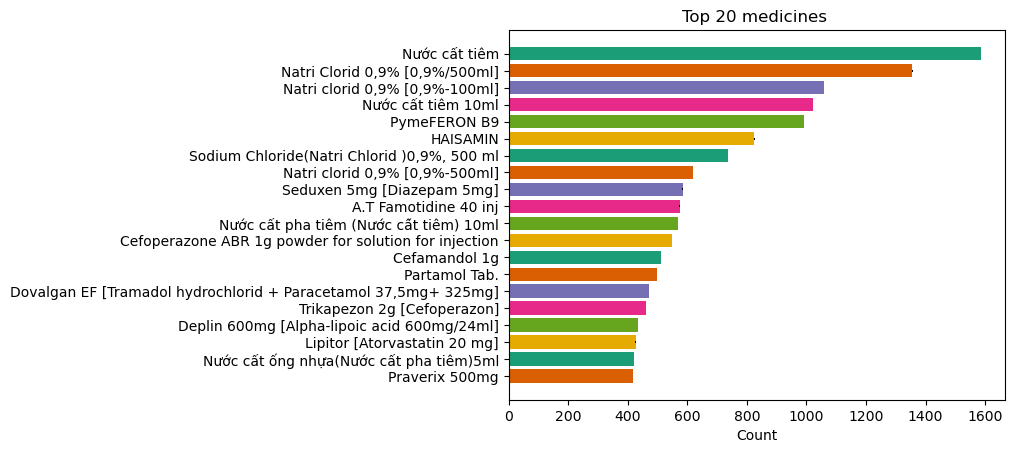

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
tenthuoc = list(top20_count_ten_thuoc.ten_thuoc)
y_pos = np.arange(len(tenthuoc))
performance = 3 + 10 * np.random.rand(len(tenthuoc))
error = np.random.rand(len(tenthuoc))
colors = plt.cm.Dark2(range(6))
ax.barh(y_pos, top20_count_ten_thuoc.count_thuoc, xerr=error, align='center', color=colors)
ax.set_yticks(y_pos)
ax.set_yticklabels(tenthuoc)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Count')
ax.set_title('Top 20 medicines ')
plt.savefig('Top 20 medicines.png')
plt.show()

Task :
1. Thuốc X được nơi nào mua nhiều nhất?
2. Nơi Y tiêu thụ thuốc nào nhiều nhất?


# Nơi Y tiêu thụ thuốc nào nhiều nhất?

In [22]:
df_codetinhthanh = pd.read_csv("C:\\Users\\ASUS\\Desktop\\AI Project\\MED\\tinhthanh.csv")

In [23]:
df_codetinhthanh
# df_codetinhthanh=df_codetinhthanh.set_index('code')

,code,tinhthanh
0,1,Thành phố Hà Nội
1,2,Tỉnh Hà Giang
2,4,Tỉnh Cao Bằng
3,6,Tỉnh Bắc Kạn
4,8,Tỉnh Tuyên Quang
...,...,...
59,92,Thành phố Cần Thơ
60,93,Tỉnh Hậu Giang
61,94,Tỉnh Sóc Trăng
62,95,Tỉnh Bạc Liêu


In [24]:
def code_tinh(code_num):
    code_num = int(code_num)
    name = df_codetinhthanh.loc[df_codetinhthanh.code == code_num].tinhthanh
    return name.values

In [25]:
def statis_province(name_column,name):
    
    #name_column gồm : tinh_thanh , quan_huyen, phuong_xa
    #name : tên tỉnh / tên quận huyện / tên phường xã
    
    block = df.loc[df[name_column] == name]
    don_thuoc = []
    for i in block.index:
        don_thuoc.append(split(block.ten_thuoc[i]))
    ten_thuoc_test = list(chain.from_iterable(don_thuoc))
    counter_ten_thuoc_test = list(chain.from_iterable(Counter(ten_thuoc_test).items()))
    X_test = counter_ten_thuoc_test[::2]
    Y_test = counter_ten_thuoc_test[1::2]
    count_ten_thuoc_test = pd.DataFrame({'ten_thuoc' : X_test, 'count_thuoc': Y_test})
    count_ten_thuoc_test = count_ten_thuoc_test.sort_values(by=['count_thuoc'],ascending=False)
    top20_count_ten_thuoc = count_ten_thuoc_test.head(20)
       
    
    # Plot
    plt.rcdefaults()
    fig, ax = plt.subplots()

    # Example data
    tenthuoc = list(top20_count_ten_thuoc.ten_thuoc)
    y_pos = np.arange(len(tenthuoc))
    performance = 3 + 10 * np.random.rand(len(tenthuoc))
    error = np.random.rand(len(tenthuoc))
    colors = plt.cm.Dark2(range(6))
    ax.barh(y_pos, top20_count_ten_thuoc.count_thuoc, xerr=error, align='center', color = colors)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(tenthuoc)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Count')
    ax.set_title('Top 20 medicines ' + 'Huyện Cẩm Xuyên - Tỉnh Hà Tĩnh')
    plt.savefig('Top 20 medicines Huyện Cẩm Xuyên - Tỉnh Hà Tĩnh.png' )
    plt.show()
    print(top20_count_ten_thuoc)

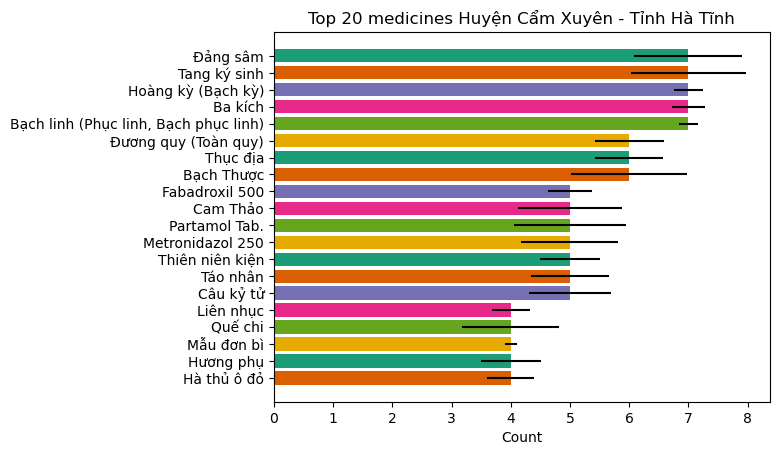

                                ten_thuoc  count_thuoc
18                               Đảng sâm            7
29                           Tang ký sinh            7
23                     Hoàng kỳ (Bạch kỳ)            7
12                                Ba kích            7
14  Bạch linh (Phục linh, Bạch phục linh)            7
20                   Đương quy (Toàn quy)            6
33                               Thục địa            6
15                             Bạch Thược            6
0                          Fabadroxil 500            5
16                               Cam Thảo            5
2                           Partamol Tab.            5
1                        Metronidazol 250            5
31                        Thiên niên kiện            5
30                               Táo nhân            5
17                              Câu kỷ tử            5
25                              Liên nhục            4
28                                Quế chi            4
27        

In [26]:
statis_province('quan_huyen','446')

# Thuốc X được nơi nào mua nhiều nhất?

In [27]:
don_thuoc_task1 = don_thuoc
ten_thuoc_task1 = list(chain.from_iterable(don_thuoc_task1))
ten_thuoc_task1[len(ten_thuoc_task1)-1]

'Tatanol'

In [28]:
# X_task1 = counter_ten_thuoc_task1[::2]
# Y_task1 = counter_ten_thuoc_task1[1::2]
# counter_ten_thuoc_task1 = pd.DataFrame({'ten_thuoc' : X_task1, 'count_thuoc': Y_task1})
# # counter_ten_thuoc_task1['tinh_thanh'] = df.ten_thuoc.str.extract(':')

In [29]:
tam = [1]*(len(ten_thuoc_task1))
counter_ten_thuoc_task1 = pd.DataFrame({'ten_thuoc':tam , 'tinh_thanh' : tam})
don_thuoc_task1 = don_thuoc
tam = 0
for i in range(len(don_thuoc_task1)):
    for j in range(len(don_thuoc_task1[i])):
            counter_ten_thuoc_task1.ten_thuoc[j + tam] = don_thuoc_task1[i][j]
            counter_ten_thuoc_task1.tinh_thanh[j + tam] = df.tinh_thanh[i]
    tam = tam + len(don_thuoc_task1[i])
#         print(don_thuoc_task1[i][j])
counter_ten_thuoc_task1['count'] = 1
counter_ten_thuoc_task1

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,ten_thuoc,tinh_thanh,count
0,Phyllantol (2020),58,1
1,Dưỡng cốt Khải Hà (2020),58,1
2,Phong thấp Khải Hà (2020),58,1
3,Bổ trung ích khí – f (2020),58,1
4,Tioga Liquid (2020),58,1
...,...,...,...
74116,"Ramifix 2,5",15,1
74117,Cetampir 800,15,1
74118,Fabafixim 200 DT,15,1
74119,Hoạt Huyết Phúc Hưng,15,1


In [30]:
task1 = counter_ten_thuoc_task1.sort_values(by='ten_thuoc', ascending=False)
task1.head(80)
task1_count= task1.groupby(['ten_thuoc','tinh_thanh']).count()
task1_count = task1_count.reset_index(inplace=False)
task1_count['boolean']=task1_count.duplicated(subset=['ten_thuoc'])

In [31]:
task1_count

,ten_thuoc,tinh_thanh,count,boolean
0,(NMI Heralbumin),31,5,False
1,-BỘ DÂY TRUYỀN ĐẾM GỌT,22,3,False
2,"-BỘ DÂY TRUYỀN ĐẾM GỌT,10%HB DIGIC(GLUTATHION+...",22,1,False
3,.. (Albucare),31,1,False
4,..(A.T Ambroxol),31,5,False
...,...,...,...,...
5595,Ống nội khí quản số các số có bóng,22,1,False
5596,Ống silicone nuôi ăn đường mũi dạ dày có phễu ...,22,1,False
5597,Ống silicone nuôi ăn đường mũi dạ dày có phễu ...,22,2,False
5598,Ống đặt nội khí quản có bóng các số,22,1,False


In [32]:
task1_count.loc[task1_count.boolean == True]

,ten_thuoc,tinh_thanh,count,boolean
53,3BTP,25,10,True
75,ACRIPTEGA,40,1,True
87,AGILOSART-H 100/25,40,1,True
106,ASPIRIN 81mg,58,9,True
143,Acetylcystein,40,10,True
...,...,...,...,...
5563,Đảng sâm,42,7,True
5576,Đỗ trọng,25,12,True
5577,Đỗ trọng,42,3,True
5582,Độc hoạt,25,4,True


In [33]:
task1_count.loc[task1_count.ten_thuoc == 'Đỗ trọng'].sort_values(by=['count'],ascending=True)

,ten_thuoc,tinh_thanh,count,boolean
5577,Đỗ trọng,42,3,True
5576,Đỗ trọng,25,12,True
5575,Đỗ trọng,15,38,False


In [34]:
df.loc[df.tinh_thanh == '58']

,index,ma_don_thuoc,ten_benh_nhan,tuoi_benh_nhan,loai_don_thuoc,hinh_thuc_dieu_tri,dia_chi,gioi_tinh,so_dien_thoai_nguoi_kham_benh,can_nang,...,tinh_thanh,quan_huyen,phuong_xa,ten_co_so_kham_chua_benh,dia_chi_co_so_kham_chua_benh,so_dien_thoai,ma_nha_cung_cap,created_at,updated_at,sold
0,0,2,VÕ THỊ PHÀO,71,c,ngoaitru,"thôn An Thạnh 1, Xã An Hải, Huyện Ninh Phước, ...",Nữ,9.167535e+08,NaN,...,58,582,22753,BỆNH VIỆN Y DƯỢC CỔ TRUYỀN NINH THUẬN,Số 05 Lê Hồng Phong - Phường Mỹ Hương - Thành ...,0259 3820668,1.0,3/29/2021 11:12,3/29/2021 11:12,NaN
1,1,3,NGUYỄN BẢO QUỐC,38,c,ngoaitru,"Xã Phước Hữu, Huyện Ninh Phước, Ninh Thuận",Nam,2.593673e+09,62.0,...,58,587,22870,TRUNG TÂM Y TẾ HUYỆN NINH PHƯỚC,Chung Mỹ - Thị trấn Phước Dân - Huyện Ninh Phư...,919301156,1.0,3/29/2021 11:12,3/29/2021 11:12,NaN
3,3,5,LƯU THỊ XUÂN DUNG,53,c,ngoaitru,"Chất Thường, Xã Phước Hậu, Huyện Ninh Phước, N...",Nữ,0.000000e+00,62.0,...,58,587,22882,BỆNH VIỆN LAO VÀ BỆNH PHỔI TỈNH NINH THUẬN,Quốc lộ 1A - Xã Phước Thuận - Huyện Ninh Phước...,NaN,1.0,3/29/2021 11:12,3/29/2021 11:12,NaN
4,4,6,NGUYỄN NGỌC HẢI,63,c,ngoaitru,"Phường Kinh Dinh, Thành phố Phan Rang-Tháp Chà...",Nam,1.234568e+08,NaN,...,58,586,22834,BỆNH VIỆN ĐA KHOA HUYỆN NINH HẢI,93 Phạm Ngọc Thạch - Thị trấn Khánh Hải - Huyệ...,NaN,1.0,3/29/2021 11:12,3/29/2021 11:12,NaN
6,6,8,PHẠM CƯỜNG,64,c,ngoaitru,"kp8, Phường Đông Hải, Thành phố Phan Rang-Tháp...",Nam,9.465701e+08,67.0,...,58,582,22741,BỆNH VIỆN CHUYÊN KHOA DA LIỄU-TÂM THẦN,số 30 Phạm Ngũ Lão - Phường Phước Mỹ - Thành p...,2593823039,1.0,3/29/2021 11:12,3/29/2021 11:12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15723,15724,15726,ĐỔNG VĂN ĐỊNH,34,c,ngoaitru,"Thị trấn Phước Dân, Huyện Ninh Phước, Ninh Thuận",Nam,3.679377e+08,59.0,...,58,582,22759,PHÒNG KHÁM ĐA KHOA 16/4,18 đường 16/4 - Phường Kinh Dinh - Thành phố P...,2593822252,1.0,3/28/2021 7:45,3/28/2021 7:45,NaN
15733,15734,15736,TRẦN THỊ DUNG,66,c,ngoaitru,"lạc sơn 3, Xã Cà Ná, Huyện Thuận Nam, Ninh Thuận",Nữ,3.527317e+08,50.0,...,58,582,22759,PHÒNG KHÁM ĐA KHOA 16/4,18 đường 16/4 - Phường Kinh Dinh - Thành phố P...,2593822252,1.0,3/28/2021 7:40,3/28/2021 7:40,NaN
15734,15735,15737,NGUYỄN THỊ ĐỨC,67,c,ngoaitru,"Xã Thành Hải, Thành phố Phan Rang-Tháp Chàm, N...",Nữ,3.347117e+08,43.0,...,58,582,22759,PHÒNG KHÁM ĐA KHOA 16/4,18 đường 16/4 - Phường Kinh Dinh - Thành phố P...,2593822252,1.0,3/28/2021 7:40,3/28/2021 7:40,NaN
15750,15751,15753,TRẦN VƯƠNG,39,c,ngoaitru,"Xã Mỹ Sơn, Huyện Ninh Sơn, Ninh Thuận",Nam,9.463923e+08,51.0,...,58,582,22759,PHÒNG KHÁM ĐA KHOA 16/4,18 đường 16/4 - Phường Kinh Dinh - Thành phố P...,2593822252,1.0,3/28/2021 7:35,3/28/2021 7:35,NaN


In [35]:
task1_count.loc[task1_count.boolean == True].head(80)

,ten_thuoc,tinh_thanh,count,boolean
53,3BTP,25,10,True
75,ACRIPTEGA,40,1,True
87,AGILOSART-H 100/25,40,1,True
106,ASPIRIN 81mg,58,9,True
143,Acetylcystein,40,10,True
...,...,...,...,...
1140,Cephalexin 500mg,42,7,True
1152,Cerecaps,22,2,True
1153,Cerecaps,25,70,True
1154,Cerecaps,31,15,True


# Frequent itemset

In [36]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(don_thuoc).transform(don_thuoc)

In [37]:
don_thuoc

[['Phyllantol (2020)',
  'Dưỡng cốt Khải Hà (2020)',
  'Phong thấp Khải Hà (2020)',
  'Bổ trung ích khí – f (2020)',
  'Tioga Liquid (2020)',
  'Bổ huyết ích não (2020)',
  'An thần bổ tâm (2020)'],
 ['Omeprazol 20mg',
  'Paracetamol (acetaminophen) 500mg',
  'Ketoprofen 75mg',
  'Magnesi hydroxyd + nhôm hydroxyd + simethicon 800,4mg + 4596mg + 80mg',
  'Vitamin B1 + B6 + B12 115mg + 100mg + 50mcg'],
 ['Vitamin 3B-PV', 'Atiliver Diệp hạ châu'],
 ['Budesonid + formoterol (160mcg + 4,5 mcg); 120 liều'],
 ['Cinnarizin 25mg',
  'Losartan Kali 50mg',
  'Meloxicam 7,5mg',
  'Glucosamin 500mg',
  'Omeprazol 20mg',
  'Acetylsalicylic acid 81mg'],
 ['Natri clorid 0,9% 500ml 0,9%/500ml',
  'Diaphyllin Venosum 4,8%,5ml',
  'Glucose 5% 250ml 5%,250ml',
  'Taxibiotic 2000 2g',
  'Preforin injection 40mg',
  'Paratriam 200mg Powder 200mg',
  'RACIPER 20MG 20mg'],
 ['Piracetam (Neu-stam 800) 800mg',
  'Paracetamol (acetaminophen) (Panactol 650) 650mg',
  'Vitamin B1 + B6 + B12 (Neurotrivit) 100mg + 2

In [38]:
df_thuoc = pd.DataFrame(te_ary, columns=te.columns_)
test = df_thuoc.sample(1000)

In [39]:
test

,(NMI Heralbumin),-BỘ DÂY TRUYỀN ĐẾM GỌT,"-BỘ DÂY TRUYỀN ĐẾM GỌT,10%HB DIGIC(GLUTATHION+SILYMARIN...) 500mg+100mg+100mg+100mg,10%Fast Paloma(HMB 100mg+Nano curcmin20mg+papain 10mg)",.. (Albucare),..(A.T Ambroxol),..(Abvaceff 200),..(DH-Subtins),..(Letsuxy),... (Aminotein),... (An tâm cung hoàn),...,Độc hoạt tang ký sinh [2019],Độc hoạt..,đóng gói)-natriclorua pha tiêm 1000g,ỐNG HÚT KÍN,Ống hút số 5,Ống nội khí quản số các số có bóng,Ống silicone nuôi ăn đường mũi dạ dày có phễu và nắp(Loại đầu mở),Ống silicone nuôi ăn đường mũi dạ dày có phễu và nắp(loại đầu đóng),Ống đặt nội khí quản có bóng các số,… (Akasoli)
12104,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1948,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11101,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
10688,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4855,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2939,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15361,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
11344,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12834,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [40]:
test.to_csv('df_thuoc.csv', index=False)

In [41]:
# df_thuoc_01 = df_thuoc*1
# df_thuoc_01

In [42]:
# pip install Orange3-Associate

In [43]:
from orangecontrib.associate.fpgrowth import *

In [44]:
te_ary = test.to_numpy()
(te_ary)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [45]:
itemsets_not1 = []
supports = []
for itemset, support in frequent_itemsets(te_ary, 0.01):
    if (len(itemset) >= 2):
        itemsets_not1.append(itemset)
        supports.append(support)
        print(str(itemset) + ", " + str(support))

frozenset({3234, 3266}), 13
frozenset({3234, 3423}), 17
frozenset({2146, 62}), 17
frozenset({2146, 3267}), 16
frozenset({3266, 4574}), 15
frozenset({4124, 62}), 10
frozenset({2146, 4124}), 12
frozenset({4199, 495}), 12
frozenset({2146, 3228}), 16
frozenset({3267, 3228}), 10
frozenset({2146, 3267, 3228}), 10
frozenset({3234, 1415}), 11
frozenset({3423, 1415}), 11
frozenset({3074, 3423}), 13
frozenset({1004, 3421}), 16
frozenset({3429, 4407}), 10
frozenset({3234, 103}), 11
frozenset({3266, 3914}), 10
frozenset({2673, 4686}), 12
frozenset({3633, 1740}), 10
frozenset({3816, 4199}), 11
frozenset({1008, 3419}), 11


In [46]:
def rename_frozenset(frozensets):
    a = list(frozensets)
    name = []
    for i in range(len(a)):
        name.append(test.columns[a[i]])
    return name


frequent_itemsets_med = pd.DataFrame({'itemsets':itemsets_not1 , 'supports' : supports})
for i in range(len(frequent_itemsets_med)):
    frequent_itemsets_med.itemsets[i] = rename_frozenset(frequent_itemsets_med.itemsets[i])

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [59]:
for i in range(len(itemsets_not1)):
    print("<<<<" + str(rename_frozenset(itemsets_not1[i])) + " >>>> Support: " + str(supports[i]))

<<<<['Natri Clorid 0,9% [0,9%/500ml]', 'Natri clorid 0,9% [0,9%-100ml]'] >>>> Support: 13
<<<<['Natri Clorid 0,9% [0,9%/500ml]', 'Nước cất tiêm 10ml'] >>>> Support: 17
<<<<['HAISAMIN', 'A.T Famotidine 40 inj'] >>>> Support: 17
<<<<['HAISAMIN', 'Natri clorid 0,9% [0,9%-500ml]'] >>>> Support: 16
<<<<['Natri clorid 0,9% [0,9%-100ml]', 'Trikapezon 2g [Cefoperazon]'] >>>> Support: 15
<<<<['Seduxen 5mg [Diazepam 5mg]', 'A.T Famotidine 40 inj'] >>>> Support: 10
<<<<['HAISAMIN', 'Seduxen 5mg [Diazepam 5mg]'] >>>> Support: 12
<<<<['Sodium Chloride(Natri Chlorid )0,9%, 500 ml', 'Aupiflox 400mg/250ml (Moxifloxacin)'] >>>> Support: 12
<<<<['HAISAMIN', 'Naptogast 20 [Pantoprazol]'] >>>> Support: 16
<<<<['Natri clorid 0,9% [0,9%-500ml]', 'Naptogast 20 [Pantoprazol]'] >>>> Support: 10
<<<<['HAISAMIN', 'Natri clorid 0,9% [0,9%-500ml]', 'Naptogast 20 [Pantoprazol]'] >>>> Support: 10
<<<<['Natri Clorid 0,9% [0,9%/500ml]', 'Deplin 600mg [Alpha-lipoic acid 600mg/24ml]'] >>>> Support: 11
<<<<['Nước cất tiê

In [60]:
itemsets = dict(frequent_itemsets(te_ary, 0.01))

In [61]:
itemsets

{frozenset({3234}): 66,
 frozenset({3266}): 51,
 frozenset({3234, 3266}): 13,
 frozenset({3423}): 44,
 frozenset({3234, 3423}): 17,
 frozenset({4199}): 43,
 frozenset({2146}): 42,
 frozenset({3419}): 30,
 frozenset({62}): 28,
 frozenset({62, 2146}): 17,
 frozenset({3421}): 27,
 frozenset({3267}): 25,
 frozenset({2146, 3267}): 16,
 frozenset({4574}): 25,
 frozenset({3266, 4574}): 15,
 frozenset({4124}): 23,
 frozenset({62, 4124}): 10,
 frozenset({2146, 4124}): 12,
 frozenset({3429}): 21,
 frozenset({495}): 20,
 frozenset({495, 4199}): 12,
 frozenset({2076}): 19,
 frozenset({3633}): 19,
 frozenset({3228}): 18,
 frozenset({2146, 3228}): 16,
 frozenset({3228, 3267}): 10,
 frozenset({2146, 3228, 3267}): 10,
 frozenset({2432}): 17,
 frozenset({1415}): 17,
 frozenset({1415, 3234}): 11,
 frozenset({1415, 3423}): 11,
 frozenset({3254}): 17,
 frozenset({3074}): 16,
 frozenset({3074, 3423}): 13,
 frozenset({4616}): 16,
 frozenset({1568}): 16,
 frozenset({4678}): 16,
 frozenset({1004}): 16,
 froze

In [62]:
rules = association_rules(itemsets, .05)
rules = list(rules)

In [63]:
test.columns[4698]
rules[0][:-2][0]

frozenset({3228, 3267})

In [64]:
rules

[(frozenset({3228, 3267}), frozenset({2146}), 10, 1.0),
 (frozenset({2146, 3228}), frozenset({3267}), 10, 0.625),
 (frozenset({3228}), frozenset({2146, 3267}), 10, 0.5555555555555556),
 (frozenset({2146}), frozenset({3228, 3267}), 10, 0.23809523809523808),
 (frozenset({2146, 3267}), frozenset({3228}), 10, 0.625),
 (frozenset({3267}), frozenset({2146, 3228}), 10, 0.4),
 (frozenset({3266}), frozenset({3234}), 13, 0.2549019607843137),
 (frozenset({3234}), frozenset({3266}), 13, 0.19696969696969696),
 (frozenset({3423}), frozenset({3234}), 17, 0.38636363636363635),
 (frozenset({3234}), frozenset({3423}), 17, 0.25757575757575757),
 (frozenset({62}), frozenset({2146}), 17, 0.6071428571428571),
 (frozenset({2146}), frozenset({62}), 17, 0.40476190476190477),
 (frozenset({3267}), frozenset({2146}), 16, 0.64),
 (frozenset({2146}), frozenset({3267}), 16, 0.38095238095238093),
 (frozenset({4574}), frozenset({3266}), 15, 0.6),
 (frozenset({3266}), frozenset({4574}), 15, 0.29411764705882354),
 (froz

In [79]:
def rename_frozenset_rules(frozensets_rules):
    name = []
    tam = frozensets_rules[:-2]
    for i in range(len(tam)):
        a = rename_frozenset(tam[i])
        name.append(a)
        if i != (len(tam)-1):
            name.append("===>")
    b = frozensets_rules[-2:]
    index = ['sup','conf']
    name = name + index + [b]
    return name

In [80]:
for i in rules:
    print(rename_frozenset_rules(i))

[['Natri clorid 0,9% [0,9%-500ml]', 'Naptogast 20 [Pantoprazol]'], '===>', ['HAISAMIN'], 'sup', 'conf', (10, 1.0)]
[['HAISAMIN', 'Naptogast 20 [Pantoprazol]'], '===>', ['Natri clorid 0,9% [0,9%-500ml]'], 'sup', 'conf', (10, 0.625)]
[['Naptogast 20 [Pantoprazol]'], '===>', ['HAISAMIN', 'Natri clorid 0,9% [0,9%-500ml]'], 'sup', 'conf', (10, 0.5555555555555556)]
[['HAISAMIN'], '===>', ['Natri clorid 0,9% [0,9%-500ml]', 'Naptogast 20 [Pantoprazol]'], 'sup', 'conf', (10, 0.23809523809523808)]
[['HAISAMIN', 'Natri clorid 0,9% [0,9%-500ml]'], '===>', ['Naptogast 20 [Pantoprazol]'], 'sup', 'conf', (10, 0.625)]
[['Natri clorid 0,9% [0,9%-500ml]'], '===>', ['HAISAMIN', 'Naptogast 20 [Pantoprazol]'], 'sup', 'conf', (10, 0.4)]
[['Natri clorid 0,9% [0,9%-100ml]'], '===>', ['Natri Clorid 0,9% [0,9%/500ml]'], 'sup', 'conf', (13, 0.2549019607843137)]
[['Natri Clorid 0,9% [0,9%/500ml]'], '===>', ['Natri clorid 0,9% [0,9%-100ml]'], 'sup', 'conf', (13, 0.19696969696969696)]
[['Nước cất tiêm 10ml'], '===>

In [67]:
rename_frozenset_rules(rules[0])

[['Natri clorid 0,9% [0,9%-500ml]', 'Naptogast 20 [Pantoprazol]'],
 '===>',
 ['HAISAMIN'],
 '===>',
 (10, 1.0)]

In [ ]:
hihihi = [1,2,3]

In [ ]:
hihihi = hihihi + [1]

In [ ]:
hihihi